## **Import Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("/kaggle/input/premier-league-20-21/EPL_20_21.csv")
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


## **EDA**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

### No missing values

In [4]:
df.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.302632,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.149881,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


### The standard deviation is very big in Mins column which means that the variation of the minutes played by every player is huge.

In [5]:
df['Club'].value_counts()

Club
West Bromwich Albion       30
Manchester United          29
Arsenal                    29
Southampton                29
Everton                    29
Liverpool FC               28
Fulham                     28
Chelsea                    27
Newcastle United           27
Brighton                   27
Wolverhampton Wanderers    27
Sheffield United           27
Leicester City             27
Burnley                    25
Manchester City            24
Crystal Palace             24
Tottenham Hotspur          24
West Ham United            24
Aston Villa                24
Leeds United               23
Name: count, dtype: int64

### West Bromwich Albion has the largest number of players in the dataset while Leeds United has the least number of players in the dataset

In [6]:
df['Club'].value_counts().std()

2.1618705350983243

### The variation also is not big between the number of players in each club

In [7]:
df['Nationality'].value_counts()

Nationality
ENG    192
FRA     31
BRA     27
ESP     26
IRL     21
POR     21
SCO     20
NED     16
WAL     12
BEL     11
GER      9
ARG      8
CIV      8
NGA      7
USA      6
DEN      6
SUI      6
SEN      5
EGY      5
ITA      5
POL      5
SWE      5
GHA      5
COL      5
NIR      5
TUR      5
AUS      4
SRB      4
NOR      3
ISL      3
ALG      3
JAM      3
CZE      3
GAB      2
SVK      2
MLI      2
COD      2
PAR      2
JPN      2
RSA      2
CMR      2
CRO      2
UKR      2
MAR      2
ZIM      1
MTN      1
NZL      1
IRN      1
CAN      1
MEX      1
BFA      1
AUT      1
MKD      1
BIH      1
URU      1
GUI      1
GRE      1
KOR      1
SKN      1
Name: count, dtype: int64

### 192 English nationality in the premier league which make sense as the league is in England

In [8]:
df['Nationality'].nunique()

59

### 59 total nationalities play in the premier league

In [9]:
df['Nationality'].value_counts().std()

25.244659063285212

### Huge variation in the nationalities seems that the premier league is a powerful league as huge number of nationalities play in it

In [10]:
df['Club'].unique()

array(['Chelsea', 'Manchester City', 'Manchester United', 'Liverpool FC',
       'Leicester City', 'West Ham United', 'Tottenham Hotspur',
       'Arsenal', 'Leeds United', 'Everton', 'Aston Villa',
       'Newcastle United', 'Wolverhampton Wanderers', 'Crystal Palace',
       'Southampton', 'Brighton', 'Burnley', 'Fulham',
       'West Bromwich Albion', 'Sheffield United'], dtype=object)

## Data Analysis on the top 2 clubs in the premier league season 20-21

## Chelsea

In [11]:
CHE = df[df['Club'] == 'Chelsea']
CHE

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0
5,César Azpilicueta,Chelsea,ESP,DF,30,26,24,2188,1,2,2015,87.5,0,0,0.03,0.11,5,1
6,N'Golo Kanté,Chelsea,FRA,MF,29,30,24,2146,0,2,1504,86.6,0,0,0.04,0.05,7,0
7,Jorginho,Chelsea,ITA,MF,28,28,23,2010,7,1,1739,89.5,7,9,0.31,0.09,2,0
8,Thiago Silva,Chelsea,BRA,DF,35,23,23,1935,2,0,1871,93.5,0,0,0.05,0.02,5,1
9,Kurt Zouma,Chelsea,FRA,DF,25,24,22,2029,5,0,1720,91.9,0,0,0.08,0.00,3,0


In [12]:
CHE['Name']

0             Mason Mount
1           Edouard Mendy
2             Timo Werner
3            Ben Chilwell
4             Reece James
5       César Azpilicueta
6            N'Golo Kanté
7                Jorginho
8            Thiago Silva
9              Kurt Zouma
10          Mateo Kovačić
11        Antonio Rüdiger
12      Christian Pulisic
13            Kai Havertz
14    Andreas Christensen
15           Hakim Ziyech
16          Tammy Abraham
17          Marcos Alonso
18     Callum Hudson-Odoi
19         Olivier Giroud
20      Kepa Arrizabalaga
21          Billy Gilmour
22        Willy Caballero
23     Ruben Loftus-Cheek
24       Emerson Palmieri
25          Fikayo Tomori
26           Ross Barkley
Name: Name, dtype: object

In [13]:
CHE['Age'].describe()

count    27.000000
mean     25.592593
std       4.717066
min      19.000000
25%      22.000000
50%      25.000000
75%      28.000000
max      38.000000
Name: Age, dtype: float64

In [14]:
# Oldest player in Chelsea
CHE[CHE['Age'] == 38]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
22,Willy Caballero,Chelsea,ARG,GK,38,1,1,90,0,0,26,92.3,0,0,0.0,0.0,0,0


### The average of ages of the players of chelsea is good as they are not old, There is no big variation in chelsea players ages

In [15]:
CHE['Nationality'].value_counts()

Nationality
ENG    8
GER    3
ESP    3
FRA    3
ITA    2
SEN    1
BRA    1
CRO    1
USA    1
DEN    1
MAR    1
SCO    1
ARG    1
Name: count, dtype: int64

### Of course the English nationality is the majority as we said before the league is played in England but the second largest nationality has 3 nationalities equal in the number of players which are Germany, Espain and France which are 3 powerful countries in the football sport

In [16]:
CHE.loc[:,['Name' , 'Nationality']]

,Name,Nationality
0,Mason Mount,ENG
1,Edouard Mendy,SEN
2,Timo Werner,GER
3,Ben Chilwell,ENG
4,Reece James,ENG
5,César Azpilicueta,ESP
6,N'Golo Kanté,FRA
7,Jorginho,ITA
8,Thiago Silva,BRA
9,Kurt Zouma,FRA


In [17]:
CHE['Position'].value_counts()

Position
DF       10
MF        5
FW        4
GK        3
MF,FW     2
FW,MF     2
FW,DF     1
Name: count, dtype: int64

### The defending position has the majority of the players play in it

In [18]:
CHE_top_5 = list(CHE['Matches'].sort_values(ascending= False).head().values)
CHE[CHE['Matches'].isin(CHE_top_5)].loc[:,['Name' , 'Matches' , 'Mins']].sort_values(by='Matches' ,ascending= False)

,Name,Matches,Mins
0,Mason Mount,36,2890
2,Timo Werner,35,2602
4,Reece James,32,2373
1,Edouard Mendy,31,2745
6,N'Golo Kanté,30,2146


### Top 5 players played matches in chelsea

In [19]:
CHE_top5_scored = CHE['Goals'].sort_values(ascending= False).head().values
CHE[CHE['Goals'].isin(CHE_top5_scored)].loc[:,['Name' , 'Goals' , 'Position']].sort_values(by='Goals' , ascending= False)

,Name,Goals,Position
7,Jorginho,7,MF
0,Mason Mount,6,"MF,FW"
2,Timo Werner,6,FW
16,Tammy Abraham,6,FW
9,Kurt Zouma,5,DF


### Top 5 players scored

In [20]:
CHE_top5_assisted = CHE['Assists'].sort_values(ascending= False).head().values
CHE[CHE['Assists'].isin(CHE_top5_assisted)].loc[:,['Name' , 'Assists' , 'Position']].sort_values(by='Assists' , ascending= False)

,Name,Assists,Position
2,Timo Werner,8,FW
0,Mason Mount,5,"MF,FW"
3,Ben Chilwell,5,DF
13,Kai Havertz,3,"MF,FW"
15,Hakim Ziyech,3,"FW,MF"
18,Callum Hudson-Odoi,3,"FW,DF"


### Top 5 players make assists

In [21]:
CHE_xG = CHE['xG'].sort_values(ascending= False).head(10).values
CHE[CHE['xG'].isin(CHE_xG)].loc[:,['Name' ,'xG', 'Goals' , 'Position']].sort_values(by='xG' , ascending= False)

,Name,xG,Goals,Position
19,Olivier Giroud,0.58,4,FW
16,Tammy Abraham,0.56,6,FW
2,Timo Werner,0.41,6,FW
13,Kai Havertz,0.37,4,"MF,FW"
7,Jorginho,0.31,7,MF
12,Christian Pulisic,0.28,4,"FW,MF"
0,Mason Mount,0.21,6,"MF,FW"
17,Marcos Alonso,0.16,2,DF
15,Hakim Ziyech,0.15,2,"FW,MF"
18,Callum Hudson-Odoi,0.12,2,"FW,DF"


### The expected goals for Giroud and Abraham are higher as they are strikers for the team

In [22]:
CHE_xA = CHE['xA'].sort_values(ascending= False).head(10).values
CHE[CHE['xA'].isin(CHE_xA)].loc[:,['Name' ,'xA', 'Assists' , 'Position']].sort_values(by='xA' , ascending= False)

,Name,xA,Assists,Position
15,Hakim Ziyech,0.28,3,"FW,MF"
18,Callum Hudson-Odoi,0.26,3,"FW,DF"
0,Mason Mount,0.24,5,"MF,FW"
2,Timo Werner,0.21,8,FW
26,Ross Barkley,0.16,0,MF
12,Christian Pulisic,0.14,2,"FW,MF"
4,Reece James,0.12,2,DF
3,Ben Chilwell,0.11,5,DF
5,César Azpilicueta,0.11,2,DF
17,Marcos Alonso,0.11,0,DF


### Timo Werner has the highest assists while he is not having the highest expected assists

In [23]:
CHE.loc[:, ['Name', 'Passes_Attempted', 'Perc_Passes_Completed','Position' , 'Matches']].head(10).sort_values(by='Perc_Passes_Completed', ascending=False)

,Name,Passes_Attempted,Perc_Passes_Completed,Position,Matches
8,Thiago Silva,1871,93.5,DF,23
9,Kurt Zouma,1720,91.9,DF,24
7,Jorginho,1739,89.5,MF,28
5,César Azpilicueta,2015,87.5,DF,26
6,N'Golo Kanté,1504,86.6,MF,30
4,Reece James,1987,85.0,DF,32
1,Edouard Mendy,1007,84.6,GK,31
0,Mason Mount,1881,82.3,"MF,FW",36
3,Ben Chilwell,1806,78.6,DF,27
2,Timo Werner,826,77.2,FW,35


### The highest passes and passes completed are from the defending position and it makes sense as defending position is the least position the opponent of the other team are found in and the defending position must not make miss pass as it leads to loss

In [24]:
CHE.loc[:, ['Name','Yellow_Cards','Red_Cards','Position']].sort_values(by= 'Yellow_Cards' , ascending= False).head(10)

,Name,Yellow_Cards,Red_Cards,Position
6,N'Golo Kanté,7,0,MF
5,César Azpilicueta,5,1,DF
8,Thiago Silva,5,1,DF
10,Mateo Kovačić,4,0,MF
3,Ben Chilwell,3,0,DF
4,Reece James,3,0,DF
15,Hakim Ziyech,3,0,"FW,MF"
9,Kurt Zouma,3,0,DF
0,Mason Mount,2,0,"MF,FW"
1,Edouard Mendy,2,0,GK


### The highest yellow cards and red cards are found in the defending position and midfield position founding high number of yellow cards and red cards in the forward position tell us whether the player is defending or having ethical problems which leads him to cards

## Manchester City

In [25]:
MCI = df[df['Club'] == 'Manchester City']
MCI

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
27,Ederson,Manchester City,BRA,GK,26,36,36,3240,0,1,1090,83.1,0,0,0.00,0.01,3,0
28,Rúben Dias,Manchester City,POR,DF,23,32,32,2843,1,0,2671,93.6,0,0,0.07,0.00,4,0
29,Rodri,Manchester City,ESP,MF,24,34,31,2748,2,2,2728,91.5,1,1,0.08,0.06,6,0
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,1127,85.4,0,1,0.43,0.17,4,0
31,João Cancelo,Manchester City,POR,DF,26,28,27,2299,2,3,2094,85.7,0,0,0.08,0.19,5,1
32,Bernardo Silva,Manchester City,POR,"MF,FW",25,26,24,2065,2,6,1427,89.7,0,0,0.12,0.16,5,0
33,İlkay Gündoğan,Manchester City,GER,MF,29,28,23,2029,13,2,1707,91.0,1,2,0.40,0.20,1,0
34,Kevin De Bruyne,Manchester City,BEL,MF,29,25,23,1997,6,12,1406,76.0,2,3,0.44,0.46,1,0
35,Riyad Mahrez,Manchester City,ALG,FW,29,27,23,1949,9,6,1086,84.2,0,0,0.26,0.27,0,0
36,Gabriel Jesus,Manchester City,BRA,FW,23,29,22,2063,9,4,754,84.6,0,0,0.38,0.15,2,0


In [26]:
MCI['Name']

27                Ederson
28             Rúben Dias
29                  Rodri
30        Raheem Sterling
31           João Cancelo
32         Bernardo Silva
33         İlkay Gündoğan
34        Kevin De Bruyne
35           Riyad Mahrez
36          Gabriel Jesus
37            Kyle Walker
38            John Stones
39             Phil Foden
40    Oleksandr Zinchenko
41          Ferrán Torres
42        Aymeric Laporte
43            Fernandinho
44         Benjamin Mendy
45             Nathan Aké
46          Sergio Agüero
47            Eric García
48           Scott Carson
49           Zack Steffen
50             Liam Delap
Name: Name, dtype: object

In [27]:
MCI['Nationality'].value_counts()

Nationality
ENG    6
BRA    3
POR    3
ESP    3
FRA    2
GER    1
BEL    1
ALG    1
UKR    1
NED    1
ARG    1
USA    1
Name: count, dtype: int64

In [28]:
MCI['Position'].value_counts()

Position
DF       9
MF       4
FW       4
GK       3
FW,MF    3
MF,FW    1
Name: count, dtype: int64

In [29]:
MCI['Age'].describe()

count    24.000000
mean     25.708333
std       4.467070
min      17.000000
25%      23.000000
50%      25.500000
75%      29.000000
max      35.000000
Name: Age, dtype: float64

In [30]:
MCI[MCI['Age'] == 17]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
50,Liam Delap,Manchester City,ENG,FW,17,1,0,40,0,0,7,71.4,0,0,0.06,0.0,0,0


In [31]:
MCI_Top5_Played = list(MCI['Matches'].sort_values(ascending=False).head(5).values)
MCI[MCI['Matches'].isin(MCI_Top5_Played)].loc[:, ['Name', 'Matches', 'Mins','Position']].sort_values(by='Matches', ascending=False)

,Name,Matches,Mins,Position
27,Ederson,36,3240,GK
29,Rodri,34,2748,MF
28,Rúben Dias,32,2843,DF
30,Raheem Sterling,31,2536,FW
36,Gabriel Jesus,29,2063,FW


In [32]:
MCI_Top5_Scored = list(MCI['Goals'].sort_values(ascending=False).head(5).values)
MCI[MCI['Goals'].isin(MCI_Top5_Scored)].loc[:, ['Name', 'Goals', 'Position']].sort_values(by='Goals', ascending=False)

,Name,Goals,Position
33,İlkay Gündoğan,13,MF
30,Raheem Sterling,10,FW
35,Riyad Mahrez,9,FW
36,Gabriel Jesus,9,FW
39,Phil Foden,9,"FW,MF"


In [33]:
MCI_Top5_Assisted = list(MCI['Assists'].sort_values(ascending=False).head(5).values)
MCI[MCI['Assists'].isin(MCI_Top5_Assisted)].loc[:, ['Name', 'Assists','Position']].sort_values(by='Assists', ascending=False)

,Name,Assists,Position
34,Kevin De Bruyne,12,MF
30,Raheem Sterling,7,FW
32,Bernardo Silva,6,"MF,FW"
35,Riyad Mahrez,6,FW
39,Phil Foden,5,"FW,MF"


In [34]:
MCI_xG = list(MCI['xG'].sort_values(ascending=False).head(10).values)
MCI[MCI['xG'].isin(MCI_xG)].loc[:, ['Name', 'Goals', 'xG','Position']].sort_values(by='xG', ascending=False)

,Name,Goals,xG,Position
46,Sergio Agüero,4,0.54,"FW,MF"
34,Kevin De Bruyne,6,0.44,MF
30,Raheem Sterling,10,0.43,FW
33,İlkay Gündoğan,13,0.40,MF
36,Gabriel Jesus,9,0.38,FW
41,Ferrán Torres,7,0.37,"FW,MF"
39,Phil Foden,9,0.31,"FW,MF"
35,Riyad Mahrez,9,0.26,FW
32,Bernardo Silva,2,0.12,"MF,FW"
38,John Stones,4,0.10,DF


In [35]:
MCI_xA = list(MCI['xA'].sort_values(ascending=False).head(10).values)
MCI[MCI['xA'].isin(MCI_xA)].loc[:, ['Name', 'Assists', 'xA','Position']].sort_values(by='xA', ascending=False)

,Name,Assists,xA,Position
34,Kevin De Bruyne,12,0.46,MF
35,Riyad Mahrez,6,0.27,FW
39,Phil Foden,5,0.23,"FW,MF"
46,Sergio Agüero,1,0.21,"FW,MF"
33,İlkay Gündoğan,2,0.20,MF
31,João Cancelo,3,0.19,DF
30,Raheem Sterling,7,0.17,FW
32,Bernardo Silva,6,0.16,"MF,FW"
36,Gabriel Jesus,4,0.15,FW
41,Ferrán Torres,2,0.13,"FW,MF"


In [36]:
MCI.loc[:, ['Name', 'Passes_Attempted', 'Perc_Passes_Completed','Position']].sort_values(by='Perc_Passes_Completed', ascending=False)

,Name,Passes_Attempted,Perc_Passes_Completed,Position
38,John Stones,1713,94.3,DF
48,Scott Carson,16,93.8,GK
47,Eric García,344,93.6,DF
28,Rúben Dias,2671,93.6,DF
45,Nathan Aké,755,93.0,DF
42,Aymeric Laporte,1261,92.0,DF
29,Rodri,2728,91.5,MF
33,İlkay Gündoğan,1707,91.0,MF
40,Oleksandr Zinchenko,1475,90.2,DF
32,Bernardo Silva,1427,89.7,"MF,FW"


In [37]:
MCI.loc[:, ['Name', 'Yellow_Cards', 'Red_Cards','Position']].sort_values(by='Yellow_Cards', ascending=False)

,Name,Yellow_Cards,Red_Cards,Position
29,Rodri,6,0,MF
43,Fernandinho,6,0,MF
31,João Cancelo,5,1,DF
32,Bernardo Silva,5,0,"MF,FW"
45,Nathan Aké,4,0,DF
28,Rúben Dias,4,0,DF
30,Raheem Sterling,4,0,FW
27,Ederson,3,0,GK
44,Benjamin Mendy,2,0,DF
36,Gabriel Jesus,2,0,FW


## **Insights And visualization**

In [38]:
Top_score_players = df['Goals'].sort_values(ascending= False).head()
df[df['Goals'].isin(Top_score_players)].loc[:,['Name' , 'Club' , 'Nationality' , 'Goals' , 'Position']].sort_values(by='Goals' , ascending= False)

,Name,Club,Nationality,Goals,Position
162,Harry Kane,Tottenham Hotspur,ENG,23,FW
81,Mohamed Salah,Liverpool FC,EGY,22,FW
51,Bruno Fernandes,Manchester United,POR,18,MF
161,Son Heung-min,Tottenham Hotspur,KOR,17,FW
214,Patrick Bamford,Leeds United,ENG,17,FW


In [39]:
Top_assisting_players = df['Assists'].sort_values(ascending= False).head()
df[df['Assists'].isin(Top_assisting_players)].loc[:,['Name' , 'Club' , 'Nationality' , 'Assists' , 'Position']].sort_values(by='Assists' , ascending= False)

,Name,Club,Nationality,Assists,Position
162,Harry Kane,Tottenham Hotspur,ENG,14,FW
81,Mohamed Salah,Liverpool FC,EGY,13,FW
34,Kevin De Bruyne,Manchester City,BEL,12,MF
51,Bruno Fernandes,Manchester United,POR,12,MF
161,Son Heung-min,Tottenham Hotspur,KOR,10,FW
273,Jack Grealish,Aston Villa,ENG,10,"FW,MF"


In [40]:
df.groupby('Club')['Goals'].sum().sort_values(ascending= False).head()

Club
Manchester City      82
Manchester United    70
Tottenham Hotspur    66
Liverpool FC         65
Leicester City       64
Name: Goals, dtype: int64

### As Manchester City scored a lot of goals but also they didn't win the league

In [41]:
df.groupby('Club')['Assists'].sum().sort_values(ascending= False).head()

Club
Manchester City      55
Liverpool FC         51
Manchester United    51
Tottenham Hotspur    50
West Ham United      46
Name: Assists, dtype: int64

In [42]:
Time_played = df['Mins'].sort_values(ascending= False).head()
df[df['Mins'].isin(Time_played)].loc[:,['Name' , 'Mins','Club' , 'Nationality' , 'Position']].sort_values(by='Mins' , ascending= False)

,Name,Mins,Club,Nationality,Position
108,Kasper Schmeichel,3420,Leicester City,DEN,GK
159,Pierre Højbjerg,3420,Tottenham Hotspur,DEN,MF
160,Hugo Lloris,3420,Tottenham Hotspur,FRA,GK
264,Emiliano Martínez,3420,Aston Villa,ARG,GK
366,James Ward-Prowse,3420,Southampton,ENG,MF
505,Aaron Ramsdale,3420,Sheffield United,ENG,GK


### Most played players are goal keepers as they have less injuries than other positions

In [43]:
df.groupby('Club')['Yellow_Cards'].sum().sort_values(ascending=False).head(5)

Club
Sheffield United     73
Aston Villa          71
Fulham               67
Newcastle United     65
Manchester United    64
Name: Yellow_Cards, dtype: int64

In [44]:
df.groupby('Club')['Yellow_Cards'].sum().sort_values(ascending=True).head(5)

Club
Liverpool FC       40
Manchester City    46
Burnley            48
Arsenal            49
Brighton           49
Name: Yellow_Cards, dtype: int64

In [45]:
df.groupby('Club')['Red_Cards'].sum().sort_values(ascending=False).head(5)

Club
Brighton                6
Arsenal                 5
West Bromwich Albion    4
Aston Villa             4
Sheffield United        3
Name: Red_Cards, dtype: int64

In [46]:
df.groupby('Club')['Red_Cards'].sum().sort_values(ascending=True).head(5)

Club
Leicester City       0
Liverpool FC         0
Burnley              0
Manchester United    1
Leeds United         1
Name: Red_Cards, dtype: int64

In [47]:
Cards_plyer = list(df['Yellow_Cards'].sort_values(ascending=False).head(10).values)
df[df['Yellow_Cards'].isin(Cards_plyer)].loc[:, ['Name', 'Club','Yellow_Cards', 'Red_Cards','Position']].sort_values(by='Yellow_Cards', ascending=False)

,Name,Club,Yellow_Cards,Red_Cards,Position
266,John McGinn,Aston Villa,12,0,MF
53,Harry Maguire,Manchester United,11,0,DF
480,Conor Gallagher,West Bromwich Albion,11,0,MF
218,Kalvin Phillips,Leeds United,10,0,MF
270,Douglas Luiz,Aston Villa,10,1,MF
159,Pierre Højbjerg,Tottenham Hotspur,9,0,MF
242,Mason Holgate,Everton,9,0,DF
55,Luke Shaw,Manchester United,8,0,DF
189,Héctor Bellerín,Arsenal,8,0,DF
272,Matty Cash,Aston Villa,8,1,DF


In [48]:
Top_nationalities = df['Nationality'].value_counts().head()
Top_nationalities[1:]

Nationality
FRA    31
BRA    27
ESP    26
IRL    21
Name: count, dtype: int64

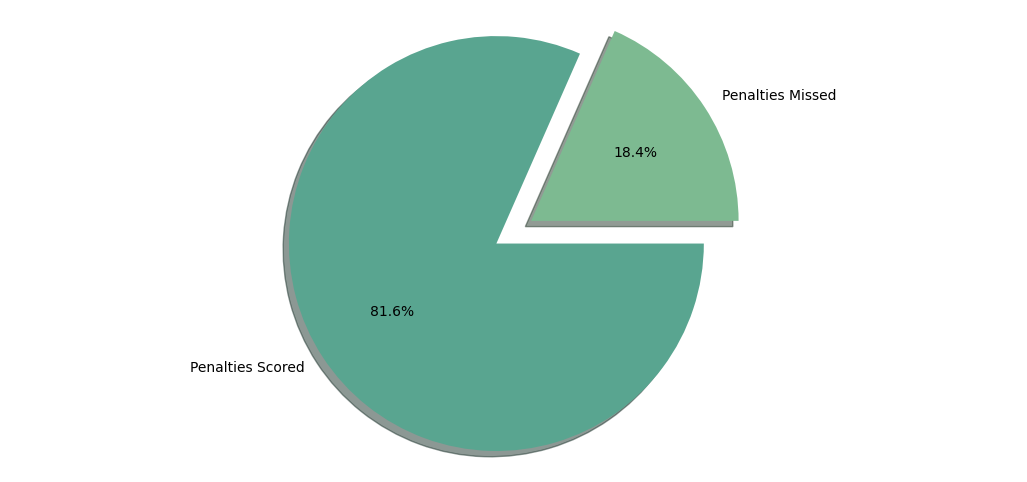

In [49]:
plt.figure(figsize=(13, 6))
pl_not_scored = df['Penalty_Attempted'].sum() - df['Penalty_Goals'].sum()
data = [pl_not_scored,df['Penalty_Goals'].sum()]
labels=['Penalties Missed','Penalties Scored']
color = sns.color_palette('crest')
plt.pie(data, labels = labels ,colors = color ,autopct ='%1.1f%%',explode = [0.1,0.1],shadow = True)

plt.axis('equal')
plt.show()

In [50]:
Position = df.groupby('Position').size().sort_values(ascending= False)
fig = px.bar(Position)
fig.show()

In [51]:
Ages = df.groupby('Club')['Age'].mean()
fig = px.bar(Ages)
fig.show()